In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("../../data/CHALLENGER_gamedata_10e4_2023-09-23.csv")
matrix = pd.read_csv("../../data/corr_matrix (1).csv")

In [4]:
matrix

Unnamed: 0       win     kills    deaths   assists   
0                            win  1.000000  0.272746 -0.371087  0.296317  \
1                          kills  0.272746  1.000000  0.157966  0.223971   
2                         deaths -0.371087  0.157966  1.000000  0.328504   
3                        assists  0.296317  0.223971  0.328504  1.000000   
4    totalDamageDealtToChampions  0.130772  0.765218  0.332844  0.304357   
..                           ...       ...       ...       ...       ...   
236                 Unnamed: 245       NaN       NaN       NaN       NaN   
237                 Unnamed: 246       NaN       NaN       NaN       NaN   
238                 Unnamed: 247       NaN       NaN       NaN       NaN   
239                 Unnamed: 248       NaN       NaN       NaN       NaN   
240                 Unnamed: 249       NaN -0.210042  0.039653 -0.522233   

     totalDamageDealtToChampions  allInPings  assistMePings  baitPings   
0                       0.130772    0.031001       0.045014  -0.001990  \
1                       0.765218    0.058687       0.098876  -0.006814   
2                       0.332844    0.019270       0.058349   0.024354   
3                       0.304357    0.084928       0.194908   0.036236   
4                       1.000000    0.083677       0.148488  -0.005403   
..                           ...         ...            ...        ...   
236                          NaN         NaN            NaN        NaN   
237                          NaN         NaN            NaN        NaN   
238                          NaN         NaN            NaN        NaN   
239                          NaN         NaN            NaN        NaN   
240                     0.056067    0.547399      -0.356348        NaN   

     baronKills  basicPings  bountyLevel  champExperience  champLevel   
0      0.158464         NaN     0.466776         0.192766    0.199402  \
1      0.229358         NaN     0.440275         0.601918    0.572225   
2     -0.007976         NaN    -0.349283         0.377602    0.336711   
3      0.121918         NaN     0.002379         0.495454    0.441332   
4      0.200140         NaN     0.214033         0.806010    0.762755   
..          ...         ...          ...              ...         ...   
236         NaN         NaN          NaN              NaN         NaN   
237         NaN         NaN          NaN              NaN         NaN   
238         NaN         NaN          NaN              NaN         NaN   
239         NaN         NaN          NaN              NaN         NaN   
240    0.666667         NaN     0.161944        -0.019200    0.166667   

     championId  championTransform  commandPings  consumablesPurchased   
0      0.007683          -0.012820      0.056358              0.032482  \
1     -0.067715           0.006648      0.071089             -0.169051   
2     -0.033119           0.013067      0.080598              0.076809   
3      0.010081          -0.003498      0.215448              0.324463   
4     -0.075218           0.010757      0.111925             -0.140333   
..          ...                ...           ...                   ...   
236         NaN                NaN           NaN                   NaN   
237         NaN                NaN           NaN                   NaN   
238         NaN                NaN           NaN                   NaN   
239         NaN                NaN           NaN                   NaN   
240   -0.377497                NaN      0.170777              0.910182   

     damageDealtToBuildings  damageDealtToObjectives  damageDealtToTurrets   
0                  0.301635                 0.264254              0.301635  \
1                  0.399993                 0.447930              0.399993   
2                 -0.085633                -0.093097             -0.085633   
3                  0.009459                 0.086652              0.009459   
4                  0.469362                 0.388017            

In [5]:
df

summonerName championName   win  kills  deaths  assists   
0     ShrimpVicious         Udyr  True      2       1       17  \
1      marshmallowo     JarvanIV  True      5       3       22   
2             블랙크핑크          Vex  True      3       4       14   
3             bnnae         Zeri  True      9       4       11   
4            서폿챔추천좀         Pyke  True     10       2        5   
...             ...          ...   ...    ...     ...      ...   
9947     HLE Roamer     Volibear  True      3       2       10   
9948         Dawn u      Sejuani  True      7       5       18   
9949      BRO Ivory         Yone  True      5       2        8   
9950        ADC0419        Kaisa  True     16       5        7   
9951           JDG1         Rell  True      3       1       27   

      totalDamageDealtToChampions  allInPings  assistMePings  assists.1   
0                           18480           0              1         17  \
1                           15472           0             13         22   
2                           17626           5             27         14   
3                           19761           0              0         11   
4                            8045           0              0          5   
...                           ...         ...            ...        ...   
9947                        16247           1              0         10   
9948                        15012           1             30         18   
9949                        11519           0              2          8   
9950                        32889           1              2          7   
9951                         7174           1              9         27   

      baitPings  baronKills  basicPings  bountyLevel  champExperience   
0             0           0           0            1            16296  \
1             0           1           0            1            13711   
2             0           0           0            0            12935   
3             0           0           0            7            13342   
4             0           0           0            9             9380   
...         ...         ...         ...          ...              ...   
9947          0           0           0            1            14434   
9948          2           0           0            0            12798   
9949          0           0           0            1            15221   
9950          0           0           0            5            13310   
9951          0           1           0            2            11698   

      champLevel  championId championName.1  championTransform  commandPings   
0             16          77           Udyr                  0            14  \
1             15          59       JarvanIV                  0            48   
2             14         711            Vex                  0            26   
3             15         221           Zeri                  0             0   
4             12         555           Pyke                  0             6   
...          ...         ...            ...                ...           ...   
9947          15         106       Volibear                  0             7   
9948          14         113        Sejuani                  0            22   
9949          16         777           Yone                  0            17   
9950          15         145          Kaisa                  0            15   
9951          14         526           Rell                  0            17   

      consumablesPurchased  damageDealtToBuildings  damageDealtToObjectives   
0                        0                    4124                     7547  \
1                        8                    2914                    39777   
2                       10                    3352                     4306   
3                        3                    5360                    22223   
4                       19                    2617                     4265   
.

In [6]:
target = df['win']

In [7]:
df.columns

Index(['summonerName', 'championName', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'allInPings', 'assistMePings',
       'assists.1',
       ...
       'turretTakedowns.1', 'turretsTakenWithRiftHerald',
       'twentyMinionsIn3SecondsCount', 'twoWardsOneSweeperCount',
       'unseenRecalls', 'visionScoreAdvantageLaneOpponent',
       'visionScorePerMinute', 'wardTakedowns', 'wardTakedownsBefore20M',
       'wardsGuarded'],
      dtype='object', length=252)

In [16]:
cols = ['summonerName', 'win', 'allInPings', 'assistMePings', 'assists.1', 'baitPings', 'championName.1', 'championTransform', 'commandPings', 'dangerPings', 'deaths.1', 'eligibleForProgression', "needVisionPings", 
       'enemyMissingPings', 'enemyVisionPings', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'getBackPings', 'holdPings', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'kills.1',
       'lane', 'largestCriticalStrike', 'mejaisFullStackInTime', 'multiKillOneSpell', 'multiTurretRiftHeraldCount', 'maxKillDeficit', 'mythicItemUsed', 'multikillsAfterAggressiveFlash',
       'outnumberedKills', 'outnumberedNexusKill', 'perfectGame', 'playedChampSelectPosition', 'poroExplosions', 'quickCleanse', 'saveAllyFromDeath', 'shortestTimeToAceFromFirstTakedown',
       'snowballsHit', 'survivedSingleDigitHpCount', 'survivedThreeImmobilizesInFight', 'takedowns', 'takedownsAfterGainingLevelAdvantage', 'takedownsBeforeJungleMinionSpawn', 'takedownsInAlcove',
       'takedownsInEnemyFountain', 'teamElderDragonKills', 'teamRiftHeraldKills', 'tookLargeDamageSurvived', 'turretTakedowns.1', 'turretsTakenWithRiftHerald', 'twentyMinionsIn3SecondsCount',
       'twoWardsOneSweeperCount', 'unseenRecalls', 'elderDragonMultikills', 'basicPings', 'bountyLevel']

In [17]:
df[df.columns[:15]]

summonerName championName   win  kills  deaths  assists   
0     ShrimpVicious         Udyr  True      2       1       17  \
1      marshmallowo     JarvanIV  True      5       3       22   
2             블랙크핑크          Vex  True      3       4       14   
3             bnnae         Zeri  True      9       4       11   
4            서폿챔추천좀         Pyke  True     10       2        5   
...             ...          ...   ...    ...     ...      ...   
9947     HLE Roamer     Volibear  True      3       2       10   
9948         Dawn u      Sejuani  True      7       5       18   
9949      BRO Ivory         Yone  True      5       2        8   
9950        ADC0419        Kaisa  True     16       5        7   
9951           JDG1         Rell  True      3       1       27   

      totalDamageDealtToChampions  allInPings  assistMePings  assists.1   
0                           18480           0              1         17  \
1                           15472           0             13         22   
2                           17626           5             27         14   
3                           19761           0              0         11   
4                            8045           0              0          5   
...                           ...         ...            ...        ...   
9947                        16247           1              0         10   
9948                        15012           1             30         18   
9949                        11519           0              2          8   
9950                        32889           1              2          7   
9951                         7174           1              9         27   

      baitPings  baronKills  basicPings  bountyLevel  champExperience  
0             0           0           0            1            16296  
1             0           1           0            1            13711  
2             0           0           0            0            12935  
3             0           0           0            7            13342  
4             0           0           0            9             9380  
...         ...         ...         ...          ...              ...  
9947          0           0           0            1            14434  
9948          2           0           0            0            12798  
9949          0           0           0            1            15221  
9950          0           0           0            5            13310  
9951          0           1           0            2            11698  

[9952 rows x 15 columns]

In [18]:
df.columns[200:250]

Index(['moreEnemyJungleThanOpponent', 'multiKillOneSpell',
       'multiTurretRiftHeraldCount', 'multikills',
       'multikillsAfterAggressiveFlash', 'mythicItemUsed',
       'outerTurretExecutesBefore10Minutes', 'outnumberedKills',
       'outnumberedNexusKill', 'perfectDragonSoulsTaken', 'perfectGame',
       'pickKillWithAlly', 'playedChampSelectPosition', 'poroExplosions',
       'quickCleanse', 'quickFirstTurret', 'quickSoloKills',
       'riftHeraldTakedowns', 'saveAllyFromDeath', 'scuttleCrabKills',
       'shortestTimeToAceFromFirstTakedown', 'skillshotsDodged',
       'skillshotsHit', 'snowballsHit', 'soloBaronKills', 'soloKills',
       'stealthWardsPlaced', 'survivedSingleDigitHpCount',
       'survivedThreeImmobilizesInFight', 'takedownOnFirstTurret', 'takedowns',
       'takedownsAfterGainingLevelAdvantage',
       'takedownsBeforeJungleMinionSpawn', 'takedownsFirstXMinutes',
       'takedownsInAlcove', 'takedownsInEnemyFountain', 'teamBaronKills',
       'teamDamagePerce

In [19]:
cols

['summonerName',
 'win',
 'allInPings',
 'assistMePings',
 'assists.1',
 'baitPings',
 'championName.1',
 'championTransform',
 'commandPings',
 'dangerPings',
 'deaths.1',
 'eligibleForProgression',
 'needVisionPings',
 'enemyMissingPings',
 'enemyVisionPings',
 'gameEndedInEarlySurrender',
 'gameEndedInSurrender',
 'getBackPings',
 'holdPings',
 'item0',
 'item1',
 'item2',
 'item3',
 'item4',
 'item5',
 'item6',
 'kills.1',
 'lane',
 'largestCriticalStrike',
 'mejaisFullStackInTime',
 'multiKillOneSpell',
 'multiTurretRiftHeraldCount',
 'maxKillDeficit',
 'mythicItemUsed',
 'multikillsAfterAggressiveFlash',
 'outnumberedKills',
 'outnumberedNexusKill',
 'perfectGame',
 'playedChampSelectPosition',
 'poroExplosions',
 'quickCleanse',
 'saveAllyFromDeath',
 'shortestTimeToAceFromFirstTakedown',
 'snowballsHit',
 'survivedSingleDigitHpCount',
 'survivedThreeImmobilizesInFight',
 'takedowns',
 'takedownsAfterGainingLevelAdvantage',
 'takedownsBeforeJungleMinionSpawn',
 'takedownsInAlcov

In [20]:
df.loc[:, cols]

summonerName   win  allInPings  assistMePings  assists.1  baitPings   
0     ShrimpVicious  True           0              1         17          0  \
1      marshmallowo  True           0             13         22          0   
2             블랙크핑크  True           5             27         14          0   
3             bnnae  True           0              0         11          0   
4            서폿챔추천좀  True           0              0          5          0   
...             ...   ...         ...            ...        ...        ...   
9947     HLE Roamer  True           1              0         10          0   
9948         Dawn u  True           1             30         18          2   
9949      BRO Ivory  True           0              2          8          0   
9950        ADC0419  True           1              2          7          0   
9951           JDG1  True           1              9         27          0   

     championName.1  championTransform  commandPings  dangerPings  deaths.1   
0              Udyr                  0            14            0         1  \
1          JarvanIV                  0            48            0         3   
2               Vex                  0            26            0         4   
3              Zeri                  0             0            0         4   
4              Pyke                  0             6            0         2   
...             ...                ...           ...          ...       ...   
9947       Volibear                  0             7            0         2   
9948        Sejuani                  0            22            0         5   
9949           Yone                  0            17            0         2   
9950          Kaisa                  0            15            0         5   
9951           Rell                  0            17            0         1   

      eligibleForProgression  needVisionPings  enemyMissingPings   
0                       True                0                  6  \
1                       True                0                 10   
2                       True                0                 21   
3                       True                0                  0   
4                       True                0                  1   
...                      ...              ...                ...   
9947                    True                0                  2   
9948                    True                1                 10   
9949                    True                0                  3   
9950                    True                0                 28   
9951                    True                1                 10   

      enemyVisionPings  gameEndedInEarlySurrender  gameEndedInSurrender   
0                    0                      False                  True  \
1                    4                      False                  True   
2                    0                      False                  True   
3                    2                      False                  True   
4                    5                      False                  True   
...                ...                        ...                   ...   
9947                 2                      False                 False   
9948                 7                      False                 False   
9949                 5                      False                 False   
9950                 4                      False                 False   
9951                 5                      False                 False   

      getBackPings  holdPings  item0  item1  item2  item3  item4  item5   
0                1          0   3041   3105   3047   4637   6665   1033  \
1                8          1      0   6630   3082   1029   3161   3111   
2                0          1   3020   4645   3157   6655   1082   1026   
3                4          0   3139      0   3006   6675   3087   1055   
4                0          

In [49]:
len(cols)

60

In [66]:
df_col1['totalDamageShieldedOnTeammates'].head(50)

0         0
1         0
2         0
3         0
4         0
5         0
6     11159
7         0
8         0
9         0
10      605
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19     1032
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29     2704
30        0
31        0
32        0
33        0
34     1581
35        0
36        0
37        0
38     3293
39     2376
40        0
41        0
42        0
43        0
44     3777
45        0
46        0
47        0
48        0
49     2279
Name: totalDamageShieldedOnTeammates, dtype: int64

In [55]:
df_col1 = df.drop(columns = cols[0])

In [58]:
df_col1.to_csv('./df_cols1.csv')

In [59]:
df_col1.columns

Index(['championName', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'baronKills', 'basicPings',
       'bountyLevel', 'champExperience', 'champLevel',
       ...
       'takedownOnFirstTurret', 'takedownsFirstXMinutes', 'teamBaronKills',
       'teamDamagePercentage', 'turretPlatesTaken',
       'visionScoreAdvantageLaneOpponent', 'visionScorePerMinute',
       'wardTakedowns', 'wardTakedownsBefore20M', 'wardsGuarded'],
      dtype='object', length=192)

In [61]:
df_col1.head(50)

championName  kills  deaths  assists  totalDamageDealtToChampions   
0          Udyr      2       1       17                        18480  \
1      JarvanIV      5       3       22                        15472   
2           Vex      3       4       14                        17626   
3          Zeri      9       4       11                        19761   
4          Pyke     10       2        5                         8045   
5        Akshan      0       8        4                        20302   
6         Ivern      3       6        5                         6738   
7      Malzahar      3       5        5                        14877   
8         Kaisa      8       4        3                        23344   
9       Alistar      0       6        9                         6900   
10       KSante      5       2       11                        25361   
11         Udyr      8       1        8                        18357   
12         Yone      4       2       10                        15555   
13        Ziggs     13       3        7                        22893   
14      Alistar      1       5       14                         4395   
15     Renekton      0       9        2                         9508   
16        Viego      1       4        6                         9700   
17         Ahri      6       6        1                        30290   
18        Kaisa      3       4        4                        17438   
19         Rell      3       8        7                         5987   
20      Leblanc      7       4        5                        24239   
21        Elise      8       5        8                        19816   
22         Fizz      5       3        9                        21045   
23       Samira      8      10        8                        21464   
24   Blitzcrank      4       6       13                         7370   
25     Renekton      1       8        4                        10699   
26      Karthus     12       7       12                        43419   
27        Jayce      1       7       15                        25287   
28         Zeri     12       4        8                        32518   
29         Bard      2       6       17                         5946   
30          Jax      3       4        2                        16490   
31         Udyr      3       4        6                        23171   
32  TwistedFate      8       8        5                        17670   
33        Kaisa      4       3        4                        20303   
34         Bard      1       5       14                        15152   
35       Gragas      1       4       13                        19929   
36     Nocturne      9       3        5                        12062   
37        Sylas      6       3       10                        16935   
38        Senna      8       5        7                        35878   
39    TahmKench      0       4       13                         9839   
40       Irelia      8       5        3                        11892   
41        Poppy      1       2        6                         6919   
42   Cassiopeia      6       1        3                        14371   
43         Zeri      1      10        3                         8340   
44        Yuumi      1       6        7                         5645   
45        Quinn      4       5        6                        16445   
46         Udyr      2       2        9                         9692   
47         Fizz      4       4        5                         9283   
48      Caitlyn     10       3        4                        24119   
49          Lux      4       3       14                        24969   

    baronKills  basicPings  bountyLevel  champExperience  champLevel   
0            0           0            1            16296          16  \
1            1           0            1            13711          15   
2            0           0            0            12935          14   
3            0           0            7   

In [36]:
kills = ['doubleKills', 'largestMultiKill', "takedownsFirstXMinutes"]
dragon = ['dragonKills', "earliestDragonTakedown", "perfectDragonSoulsTaken"]
gold = ['goldSpent']
damage = ['magicDamageDealt', 'magicDamageDealtToChampions', "physicalDamageDealt", "physicalDamageDealtToChampions","trueDamageDealt", "trueDamageDealtToChampions"]
cs = ['neutralMinonsKilled', "totalEnemyJungleMinionsKilled", "totalAllyJungleMinionsKilled", "alliedJungleMonsterKills", "baronKills", "jungleCsBefore10Minutes"]
heal = ["totalHeal", "totalDamageShieldedOnTeammates", "totalHealsOnTeammates"]
tk = ['turretKills', "outerTurretExecutesBefore10Minutes"]
legend_of_league = ['legendaryCount']
vision = ['visionScoreAdvantageLaneOpponent']
cc = ["immobilizeAndKillWithAlly"]
dive = ['killsNearEnemyTurret']
em = ['objectiveStolen']

In [37]:
df[kills]

doubleKills  largestMultiKill  takedownsFirstXMinutes
0               0                 1                     2.0
1               0                 1                     6.0
2               0                 1                     6.0
3               1                 2                     3.0
4               0                 1                     4.0
...           ...               ...                     ...
9947            0                 1                     2.0
9948            2                 2                    12.0
9949            0                 1                     6.0
9950            6                 3                    11.0
9951            0                 1                    14.0

[9952 rows x 3 columns]

In [48]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr = LogisticRegression()

In [43]:
df['win']

0       True
1       True
2       True
3       True
4       True
        ... 
9947    True
9948    True
9949    True
9950    True
9951    True
Name: win, Length: 9952, dtype: bool

In [51]:
df[kills]

doubleKills  largestMultiKill  takedownsFirstXMinutes
0               0                 1                     2.0
1               0                 1                     6.0
2               0                 1                     6.0
3               1                 2                     3.0
4               0                 1                     4.0
...           ...               ...                     ...
9947            0                 1                     2.0
9948            2                 2                    12.0
9949            0                 1                     6.0
9950            6                 3                    11.0
9951            0                 1                    14.0

[9952 rows x 3 columns]

In [54]:
df['win']

0       True
1       True
2       True
3       True
4       True
        ... 
9947    True
9948    True
9949    True
9950    True
9951    True
Name: win, Length: 9952, dtype: bool

In [59]:
df[kills] = df[kills].fillna(0)

In [60]:
lr.fit(df[kills], df['win'])

LogisticRegression()

In [65]:
lr.coef_

array([[0.12151132, 0.48475211, 0.04844463]])

In [63]:
a

In [ ]:
리니어 분석 피쳐 계수 표준화 

In [ ]:
y = w1a + w2b

In [ ]:
time = ["gameLength"]

spellNCasts = Q, W, E, R

In [69]:
df_col1['unrealKills'].sum()

0

In [71]:
df_col1['damageTakenOnTeamPercentage'].describe()

count    9920.000000
mean        0.200000
std         0.061080
min         0.000000
25%         0.156450
50%         0.190048
75%         0.239834
max         1.000000
Name: damageTakenOnTeamPercentage, dtype: float64

In [74]:
df_col1["earliestBaron"].head(10)

0    1353.766566
1    1353.766566
2    1353.766566
3    1353.766566
4    1353.766566
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
Name: earliestBaron, dtype: float64

In [77]:
df_col1["earlyLaningPhaseGoldExpAdvantage"].head(50)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     1.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    1.0
25    0.0
26    0.0
27    1.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    1.0
49    0.0
Name: earlyLaningPhaseGoldExpAdvantage, dtype: float64

In [99]:
df_col1[['championName', "wardsGuarded"]].head(30)

championName  wardsGuarded
0          Udyr           0.0
1      JarvanIV           0.0
2           Vex           0.0
3          Zeri           0.0
4          Pyke           1.0
5        Akshan           1.0
6         Ivern           1.0
7      Malzahar           0.0
8         Kaisa           0.0
9       Alistar           1.0
10       KSante           1.0
11         Udyr           1.0
12         Yone           0.0
13        Ziggs           0.0
14      Alistar           0.0
15     Renekton           0.0
16        Viego           0.0
17         Ahri           0.0
18        Kaisa           0.0
19         Rell           1.0
20      Leblanc           0.0
21        Elise           0.0
22         Fizz           1.0
23       Samira           0.0
24   Blitzcrank           1.0
25     Renekton           1.0
26      Karthus           0.0
27        Jayce           1.0
28         Zeri           1.0
29         Bard           0.0

In [68]:
champs = ['championName', 'individualPosition']
alive_or_death = ['kills', 'deaths', 'assists', 'firstBloodKill', "largestMultiKill", "kda", "multikills", "soloKills"]
tanking = ['damageSelfMitigated', "damageTakenOnTeamPercentage", "totalDamageTaken"]
monster = ["baronTakedowns", "dragonTakedowns", "epicMonsterSteals", "riftHeraldTakedowns", "scuttleCrabKills", "damageDealtToObjectives"]
exp_old = ['champExperience', 'goldEarned', "bountyGold", "goldPerMinute", "maxCsAdvantageOnLaneOpponent", "laneMinionsFirst10Minutes", "maxLevelLeadLaneOpponent"]
item = []
vision = ['detectorWardsPlaced', "visionScore", "visionWardsBoughtInGame", "wardsKilled", "wardsPlaced", "controlWardsPlaced", "stealthWardsPlaced", "visionScorePerMinute"]
times = ['longestTimeSpendLiving', 'timeCCingOthers']
cs = ["totalMinionsKilled",]
jungle_cs = ['moreEnemyJungleThanOpponent', "neutralMinonsKilled",]
buffs = ["buffsStolen"]
cc = ["totalTimeCCDealt", "enemyChampionImmobilizations"]
d_champ = ['totalDamageDealtToChampions', "totalDamageTaken", "damagePerMinute", "killParticipation", "teamDamagePercentage"]
d_building = ["damageDealtToBuildings", "firstTowerKill", "inhibitorTakedowns", "turretTakedowns", "kTurretsDestroyedBeforePlatesFall", "turretPlatesTaken"]
d_obj = ["damageDealtToObjectives"]

In [ ]:
alive_or_death = ['kills', 'deaths', 'assists', 'firstBloodKill', "largestMultiKill", "kda", "multikills", "soloKills"]
tanking = ['damageSelfMitigated', "damageTakenOnTeamPercentage", "totalDamageTaken"]
exp_old = ['champExperience', 'goldEarned', "bountyGold", "goldPerMinute", "maxCsAdvantageOnLaneOpponent", "laneMinionsFirst10Minutes", "maxLevelLeadLaneOpponent"]
times = ['longestTimeSpendLiving', 'timeCCingOthers']
d_champ = ['totalDamageDealtToChampions', "totalDamageTaken", "damagePerMinute", "killParticipation", "teamDamagePercentage"]
d_building = ["damageDealtToBuildings", "firstTowerKill", "inhibitorTakedowns", "turretTakedowns", "kTurretsDestroyedBeforePlatesFall", "turretPlatesTaken"]

In [76]:
import seaborn as sns

In [80]:
df[alive_or_death].dtypes

kills                 int64
deaths                int64
assists               int64
firstBloodKill         bool
largestMultiKill      int64
kda                 float64
multikills          float64
soloKills           float64
dtype: object

In [81]:
df[alive_or_death].corr()

kills    deaths   assists  firstBloodKill   
kills             1.000000  0.176600  0.267380        0.181116  \
deaths            0.176600  1.000000  0.357515       -0.009978   
assists           0.267380  0.357515  1.000000       -0.015484   
firstBloodKill    0.181116 -0.009978 -0.015484        1.000000   
largestMultiKill  0.729941  0.077476  0.142457        0.107567   
kda               0.326826 -0.506222  0.290331        0.074503   
multikills        0.759520  0.117051  0.168471        0.082608   
soloKills         0.437532 -0.021177 -0.098093        0.107667   

                  largestMultiKill       kda  multikills  soloKills  
kills                     0.729941  0.326826    0.759520   0.437532  
deaths                    0.077476 -0.506222    0.117051  -0.021177  
assists                   0.142457  0.290331    0.168471  -0.098093  
firstBloodKill            0.107567  0.074503    0.082608   0.107667  
largestMultiKill          1.000000  0.269531    0.809907   0.279697  
kda                       0.269531  1.000000    0.240536   0.131685  
multikills                0.809907  0.240536    1.000000   0.238305  
soloKills                 0.279697  0.131685    0.238305   1.000000

In [95]:
import statsmodels

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [114]:
vif_data = pd.DataFrame()

In [115]:
x = df[alive_or_death]

In [116]:
df['firstBloodKill'] = df['firstBloodKill'].replace(True, 1).replace(False, 0)

In [117]:
vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [118]:
vif_data

vif
0  8.532905
1  5.310722
2  4.216632
3  1.162713
4  8.690448
5  3.697675
6  3.848038
7  1.909804

<Axes: >

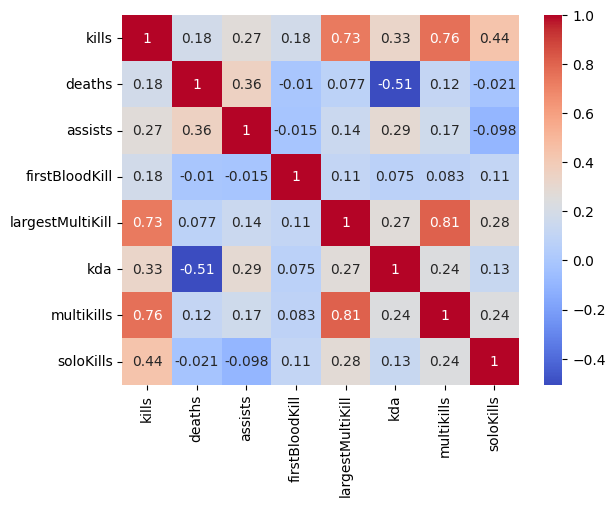

In [88]:
sns.heatmap(df[alive_or_death].fillna(0).corr(), annot=True, cmap='coolwarm')

In [70]:
df['win']

0       True
1       True
2       True
3       True
4       True
        ... 
9947    True
9948    True
9949    True
9950    True
9951    True
Name: win, Length: 9952, dtype: bool

In [72]:
df[alive_or_death] = df[alive_or_death].fillna(0)

In [73]:
lr.fit(df[alive_or_death], df['win'])

LogisticRegression()

In [74]:
lr.coef_

array([[ 0.0409629 , -0.31332961,  0.12111819,  0.07400198,  0.22268737,
         0.50184116,  0.02860519,  0.14464453]])

## 특정 컬럼(경감된피해 & 받은피해) 합산 고려할 것.